In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("feature.csv")
features=df.iloc[:,[4,9,10,11,13,14,15,17,18]]

C:\Users\ME\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


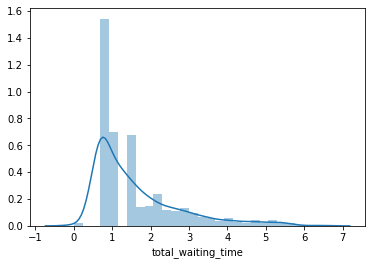

In [3]:
features['total_waiting_time']=np.log(features.total_waiting_time+1)
sns.distplot(features.total_waiting_time)

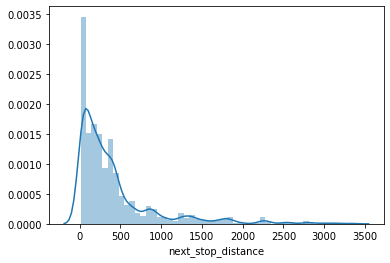

In [4]:
sns.distplot(features.next_stop_distance)

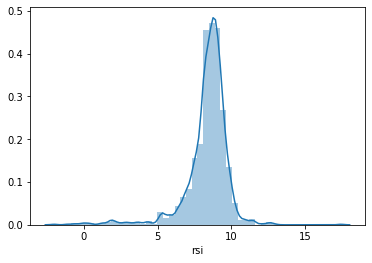

In [5]:
sns.distplot(features.rsi)

C:\Users\ME\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


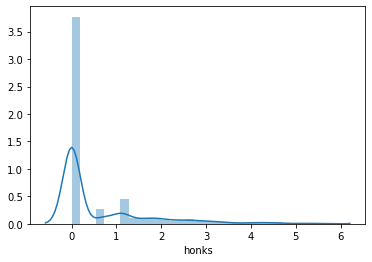

In [6]:
features['honks']=np.log(features.honks+1)
sns.distplot(features.honks)

C:\Users\ME\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


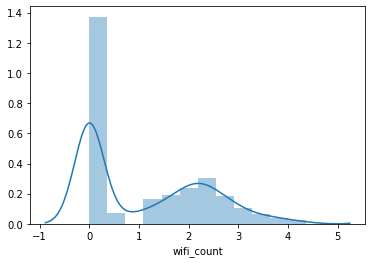

In [7]:
features['wifi_count']=np.log(features.wifi_count+1)
sns.distplot(features.wifi_count)

In [8]:
features

,total_waiting_time,next_stop_distance,time_level,zone,wifi_count,honks,rsi,Weekend/day,Population_density
0,3.401197,26.985333,1,highway,2.708050,0.000000,8.495331,Week-end,sparse
1,1.386294,46.941113,1,highway,2.397895,0.000000,7.560097,Week-end,sparse
2,1.386294,18.273221,1,highway,1.098612,0.000000,8.871223,Week-end,sparse
3,3.091042,43.098735,1,highway,1.098612,0.000000,8.646458,Week-end,sparse
4,3.688879,21.216050,1,highway,2.079442,0.000000,9.149885,Week-end,sparse
...,...,...,...,...,...,...,...,...,...
1677,1.791759,70.041602,1,normal_city,2.564949,2.302585,8.695382,Week-day,sparse
1678,3.583519,1628.129726,1,normal_city,2.708050,2.079442,9.011530,Week-day,sparse
1679,4.753590,975.667613,1,normal_city,1.386294,2.302585,9.714151,Week-day,sparse
1680,1.098612,2552.863071,1,highway,0.000000,0.000000,10.514440,Week-day,sparse


In [9]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()

In [10]:
features['time_level']=en.fit_transform(features.time_level)
features['zone']=en.fit_transform(features.zone)
features['Weekend/day']=en.fit_transform(features['Weekend/day'])
features['Population_density']=en.fit_transform(features.Population_density)

C:\Users\ME\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ME\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ME\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [11]:
encoded_features=pd.get_dummies(features,columns=features.columns[[2,3,7,8]])

In [12]:
labels=df.bus_stop

In [13]:
labels.values

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [14]:
import tensorflow as tf
from tensorboard.plugins import projector

In [15]:
writer=tf.summary.FileWriter("./logs",graph=tf.get_default_graph()) #summary writer

In [16]:
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

In [17]:
embedding_values=encoded_features.values

with open("./logs/metadata.tsv","w") as f:
    for l in labels.values:
        f.write(str(l)+'\n')

embedding_var=tf.Variable(embedding_values,name='Embeddings')
sess.run(embedding_var.initializer)

config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

embedding.metadata_path = 'metadata.tsv'

projector.visualize_embeddings(writer, config)

saver=tf.train.Saver([embedding_var])
saver.save(sess,'./logs/embeddingcheckpoint.ckpt')

'./logs/embeddingcheckpoint.ckpt'